In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
train=pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


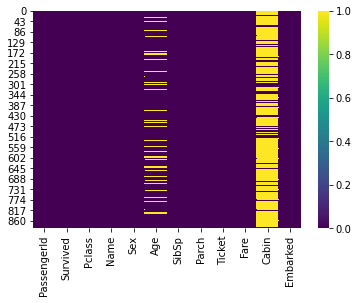

In [3]:
sns.heatmap(train.isnull(),cmap="viridis")

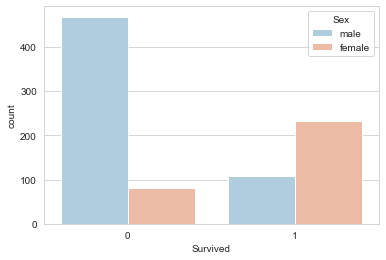

In [4]:
sns.set_style('whitegrid')
sns.countplot(train['Survived'],hue=train['Sex'],palette='RdBu_r')

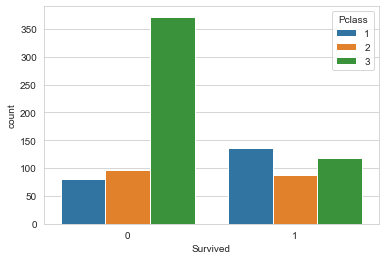

In [5]:
sns.countplot(train['Survived'],hue=train['Pclass'])

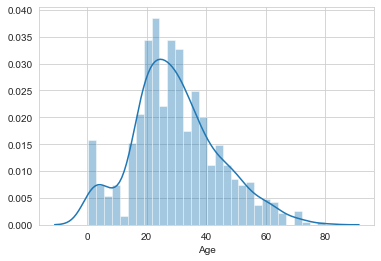

In [6]:
sns.distplot(train['Age'].dropna(),bins=30)

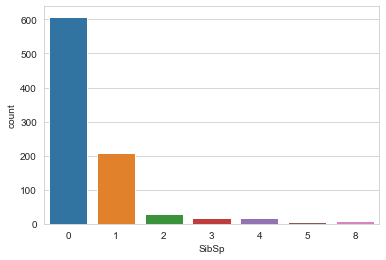

In [7]:
sns.countplot(train['SibSp'])

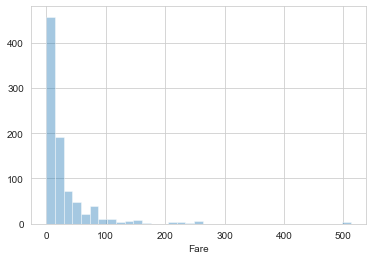

In [8]:
sns.distplot(train['Fare'],bins=35,kde=False)

In [9]:
train['Fare'].iplot(kind='hist')

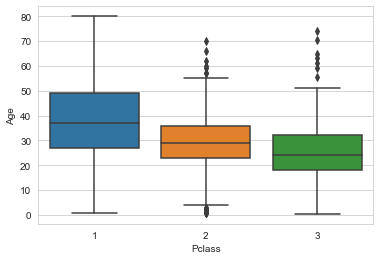

In [10]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [11]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1) #add average age to missing columns

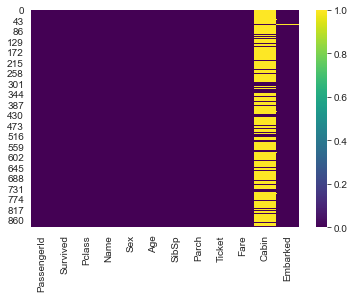

In [13]:
sns.heatmap(train.isnull(),cmap="viridis")

In [14]:
train.drop('Cabin',axis=1,inplace=True) #too many missing values in cabin so dropped
train.dropna(inplace=True) #1 embarked data missing so dropped

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [17]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [18]:
train=pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [19]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True) #dropped unusable columns

In [20]:
train.drop('PassengerId',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [21]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
logmodel=LogisticRegression()

In [24]:
logmodel.fit(X_train,y_train)

/Users/reziw3/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [25]:
pred=logmodel.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
print(confusion_matrix(y_test,pred))

[[147  16]
 [ 30  74]]


In [31]:
ad_data=pd.read_csv("advertising.csv")
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [33]:
ad_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


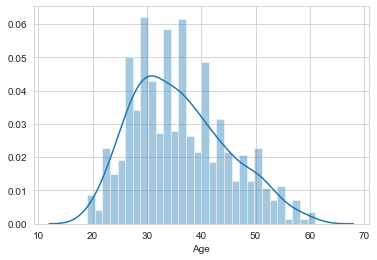

In [36]:
sns.distplot(ad_data['Age'],bins=30)

/Users/reziw3/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



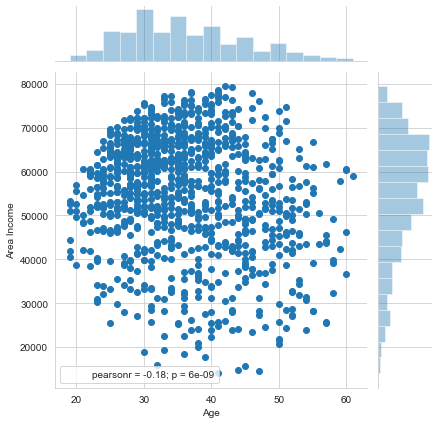

In [52]:
import scipy.stats as stat
sns.jointplot(y='Area Income',x='Age',data=ad_data,stat_func=stat.pearsonr)

/Users/reziw3/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



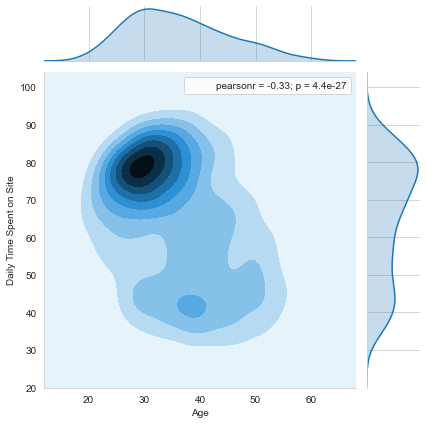

In [53]:
sns.jointplot(y='Daily Time Spent on Site',x='Age',data=ad_data,kind='kde',stat_func=stat.pearsonr)

/Users/reziw3/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



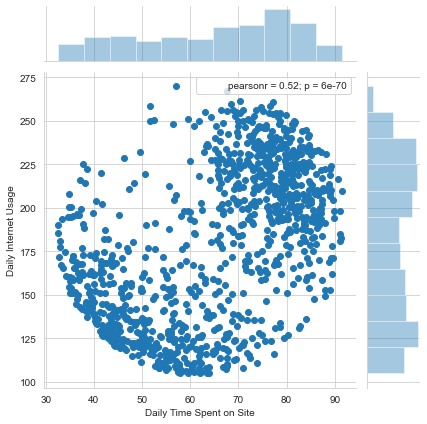

In [54]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,stat_func=stat.pearsonr)

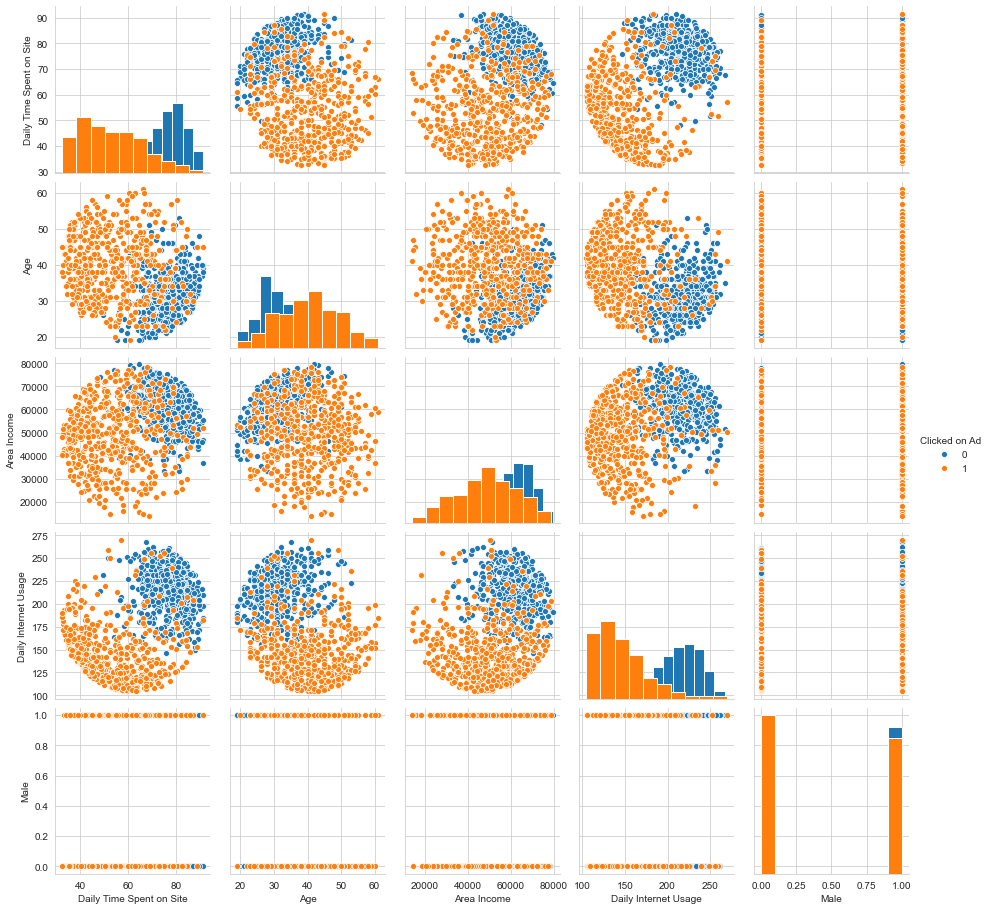

In [57]:
sns.pairplot(ad_data,hue='Clicked on Ad',diag_kind='hist')

In [58]:
X=ad_data[['Daily Time Spent on Site','Daily Internet Usage','Age','Area Income','Male']]
y=ad_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
log1=LogisticRegression()

In [62]:
log1.fit(X_train,y_train)

LogisticRegression()

In [63]:
pred=log1.predict(X_test)

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [66]:
print(confusion_matrix(y_test,pred))

[[149   8]
 [ 14 129]]
